In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

## Operacijski ojačevalnik - PD krmilnik

V analogni elektroniki se operacijski ojačevalniki uporabljajo za realizacijo PID krmilnikov. Medtem ko matematični modeli LTI sistemov predpostavljajo idealne pogoje, realna vezja tem pogojem ne ustrezajo v celoti.

V večini primerov idealen model vrne sprejemljive rezultate, a frekvenčne karakteristike bolje aproksimiramo z razširitvijo modela z vključitvijo odprtozančnega ojačanja operacijskega ojačevalnika:
<br><br>
$$G_{ideal}(s)=\frac{V_{out}}{V_{in}}=-\frac{Z_F}{Z_G}\qquad\qquad G_{approx}(s)=\frac{V_{out}}{V_{in}}=-\frac{\frac{-A\cdot Z_F}{Z_G+Z_F}}{1+\frac{A\cdot Z_G}{Z_G+Z_F}}$$
<br>

V tem interaktivnem primeru bodo prikazane nastavitve PD krmilnika z uporabo operacijskega ojačevalnika.
<br>
<b>Najprej izberi vrednost odprtozančnega ojačanja!</b>


<!-- In analog electronics, operational amplifiers are generally used for the realization of Proportional-Integral-Derivating (PID) controllers. While the mathematical model of Linear Time-invariant (LTI) systems assumes ideal conditions, the realistic circuits may not entirely match them.

In most cases, the ideal model returns acceptable results, but the frequency characteristics can be approximated better by expanding the model with the amplifier's open-loop gain:
<br><br>
$$G_{ideal}(s)=\frac{V_{out}}{V_{in}}=-\frac{Z_F}{Z_G}\qquad\qquad G_{approx}(s)=\frac{V_{out}}{V_{in}}=-\frac{\frac{-A\cdot Z_F}{Z_G+Z_F}}{1+\frac{A\cdot Z_G}{Z_G+Z_F}}$$
<br>

In this example, we'll explore some of the operational amplifier based PD controller configurations.<br>
<b>First, select an open-loop gain value for the calculations!</b> -->

In [2]:
# Model selector
opampGain = w.ToggleButtons(
    options=[('10 000', 10000), ('50 000', 50000), ('200 000', 200000),],
    description='Ojačanje operacijskega ojačevalnika: ', style={'description_width':'30%'})

display(opampGain)

ToggleButtons(description='Ojačanje operacijskega ojačevalnika: ', options=(('10 000', 10000), ('50 000', 5000…

Najenostavnejša izvedba PD krmilnika vsebuje kondenzator v direktni poti in uporovni element v povratni poti. Idealni model sledi matematični obliki PD krmilnika, a po vključitvi odprtozančnega ojačanja se pojavi komponenta prvega reda, ki služi kot nizkopasovni filter. Ta oblika PD krmilnika je pogosto uporabljena namesto idealnega v realnih aplikacijah.
<br><br>
<img src="Images/diff1.png" width="30%" />
<br>
<b>Prilagodi izbiro pasivnih elektronskih komponent tako, da bo realen (neidealen) model čim bliže idealnemu! Kje pride do preloma amplitudno-frekvenčne karakteristike? Kaj lahko poveš o fazno-frekvenčnem delu Bodejevega diagrama?</b>


<!-- The simplest implementation of the PD controller contains a capacitor in the feedforward and a resistor in the feedback path. The ideal model matches exactly the mathematical form of the controller. But after the inclusion of the open-loop gain, a first-order component appears, serving as a low-pass filter. This form of the PD controller is often used in place of the ideal version when designing applications.
<br><br>
<img src="Images/diff1.png" width="30%" />
<br>
<b>Adjust the passive components so that the non-ideal model is the closest to the ideal! Where does the significant cutoff appear? What can be said about the phase plot?</b> -->

<IPython.core.display.Javascript object>


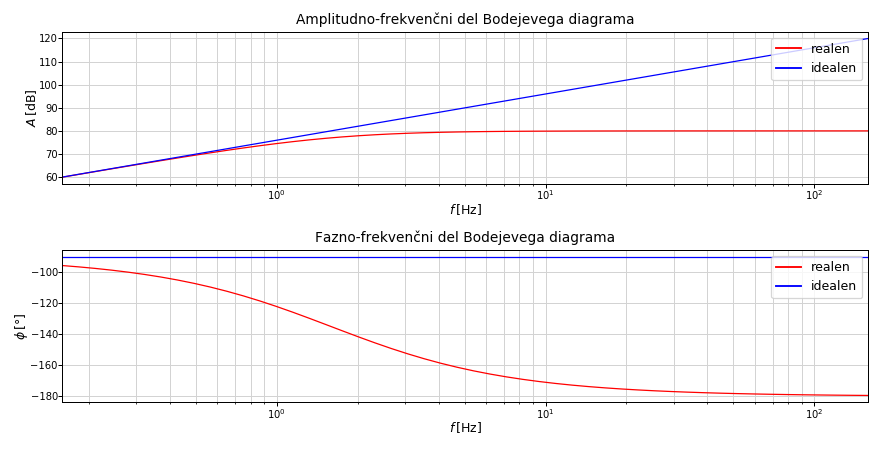

Output()

In [3]:
# Figure definition

fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1, num='Slika 1')
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

l1 = f1_ax1.plot([], [], color='red')
l2 = f1_ax2.plot([], [], color='red') 
l3 = f1_ax1.plot([], [], color='blue')
l4 = f1_ax2.plot([], [], color='blue')  

f1_line1 = l1[0]
f1_line2 = l2[0]
f1_line3 = l3[0]
f1_line4 = l4[0]
    
f1_ax1.legend(l1+l3, ['realen', 'idealen'], loc=1)
f1_ax2.legend(l2+l4, ['realen', 'idealen'], loc=1)

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='x', tight=True)
f1_ax2.autoscale(enable=True, axis='x', tight=True)
f1_ax1.autoscale(enable=True, axis='y', tight=False)
f1_ax2.autoscale(enable=True, axis='y', tight=False)

f1_ax1.set_title('Amplitudno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Fazno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)  

# System model

def system_model(cg, rf, a):

    Rf = rf / 1000      # Convert to Ohm
    Cg = cg * 1000000   # Convert to Farad

    W_ideal = c.tf([-Rf*Cg, 0], [1])
    W_ac = c.tf([-Rf*Cg*a, 0], [Rf*Cg, a+1])
    
    global f1_line1, f1_line2, f1_line3, f1_line4
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)
    f1_ax1.lines.remove(f1_line3)
    f1_ax2.lines.remove(f1_line4)

    mag, phase, omega = c.bode_plot(W_ac, Plot=False)   # Non-ideal Bode-plot
    f1_line1, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='red')
    f1_line2, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='red') 
    
    mag, phase, omega = c.bode_plot(W_ideal, omega=omega, Plot=False)   # Ideal Bode-plot at the non-ideal points
    f1_line3, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f1_line4, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   

    f1_ax1.relim()
    f1_ax2.relim()

    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    
    print('Prenosna funkcija idealnega PD krmilnika:')
    print(W_ideal)
    print('\nPrenosna funkcija realnega PD krmilnika:')
    print(W_ac)
    
# GUI widgets
    
rf_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_f\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
cg_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$C_g\ [\mu H]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})

input_data = w.interactive_output(system_model, {'rf':rf_slider, 'cg':cg_slider, 'a':opampGain})

display(w.HBox([cg_slider, rf_slider]), input_data)

Predstavljena izvedba PD krmilnika je enostavna, a ima nekaj pomanjkljivosti, npr. visoko občutljivost na šum. Z namenom zmanjšanja te pomanjkljivosti lahko v direktno pot vključimo uporovni element; pri tem prenosna funkcija sistema ohrani svojo obliko.
<br><br>
<img src="Images/diff2.png" width="30%" />
<br>
<b>Prilagodi izbiro pasivnih komponent tako, da bo realen model čim bliže idealnemu! Kakšne so razlike v primerjavi s prejšnjim modelom?</b>

<!-- This implementation of the PD controller though really simple, has a few shortcomings, including its high noise sensitivity. To reduce the this problem, a resistor can be included in the feedforward path, while the transfer function of the system keeps its shape.
<br><br>
<img src="Images/diff2.png" width="30%" />
<br>
<b>Adjust the passive components so that the non-ideal model is the closest to the ideal! What are the differences compared to the previous model?</b> -->

<IPython.core.display.Javascript object>


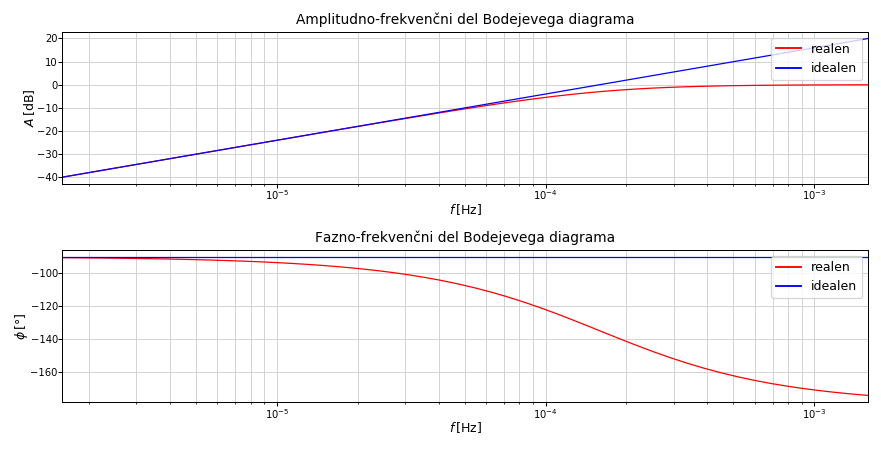

Output()

In [4]:
# Filtered PD - serial (with "stop")

fig2, ((f2_ax1), (f2_ax2)) = plt.subplots(2, 1, num='Slika 1')
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

l1 = f2_ax1.plot([], [], color='red')
l2 = f2_ax2.plot([], [], color='red') 
l3 = f2_ax1.plot([], [], color='blue')
l4 = f2_ax2.plot([], [], color='blue')  

f2_line1 = l1[0]
f2_line2 = l2[0]
f2_line3 = l3[0]
f2_line4 = l4[0]

f2_ax1.legend(l1+l3, ['realen', 'idealen'], loc=1)
f2_ax2.legend(l2+l4, ['realen', 'idealen'], loc=1)

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax2.grid(which='both', axis='both', color='lightgray')

f2_ax1.autoscale(enable=True, axis='x', tight=True)
f2_ax2.autoscale(enable=True, axis='x', tight=True)
f2_ax1.autoscale(enable=True, axis='y', tight=False)
f2_ax2.autoscale(enable=True, axis='y', tight=False)

f2_ax1.set_title('Amplitudno-frekvenčni del Bodejevega diagrama', fontsize=11)
f2_ax1.set_xscale('log')
f2_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f2_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f2_ax2.set_title('Fazno-frekvenčni del Bodejevega diagrama', fontsize=11)
f2_ax2.set_xscale('log')
f2_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f2_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f2_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

# System model

def system2_model(cg, rg, rf, a):

    Rf = rf / 1000      # Convert to Ohm
    Rg = rg / 1000 
    Cg = cg * 1000000   # Convert to Farad

    W_ideal = c.tf([-Rf*Cg, 0], [1])
    W_ac = c.tf([-Rf*Cg*a, 0], [(Rf+Rg*(a+1))*Cg, a+1])
    
    global f2_line1, f2_line2, f2_line3, f2_line4
    
    f2_ax1.lines.remove(f2_line1)
    f2_ax2.lines.remove(f2_line2)
    f2_ax1.lines.remove(f2_line3)
    f2_ax2.lines.remove(f2_line4)

    mag, phase, omega = c.bode_plot(W_ac, Plot=False)   # Non-ideal Bode-plot
    f2_line1, = f2_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='red')
    f2_line2, = f2_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='red') 
    
    mag, phase, omega = c.bode_plot(W_ideal, omega=omega, Plot=False)   # Ideal Bode-plot at the non-ideal points
    f2_line3, = f2_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f2_line4, = f2_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   

    f2_ax1.relim()
    f2_ax2.relim()
    
    f2_ax1.autoscale_view()
    f2_ax2.autoscale_view()
    
    print('Prenosna funkcija idealnega PD krmilnika::')
    print(W_ideal)
    print('\nPrenosna funkcija realnega PD krmilnika::')
    print(W_ac)
    
# GUI widgets
    
rg2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_g\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
rf2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_f\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
cg2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$C_g\ [\mu H]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})

input_data = w.interactive_output(system2_model, {'rg':rg2_slider, 'rf':rf2_slider, 'cg':cg2_slider, 'a':opampGain})

display(w.HBox([rg2_slider, cg2_slider, rf2_slider]), input_data)